🔍 Model Performance Comparison:


,Model,MAE,MSE,RMSE,R2
0,svr,3.871227,24.438756,4.943557,0.099549
1,linear,4.107544,25.812590,5.080609,0.048930
2,mlp,3.909154,25.547807,5.054484,0.058686
3,randomforest,4.009233,25.723656,5.071849,0.052207
4,decisiontree,4.074911,27.836843,5.276063,-0.025654


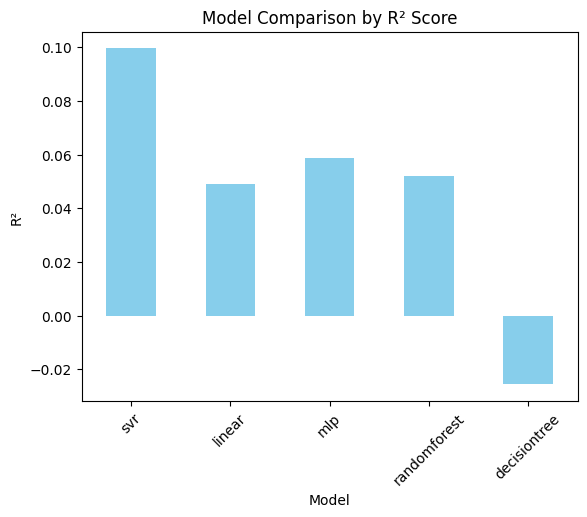

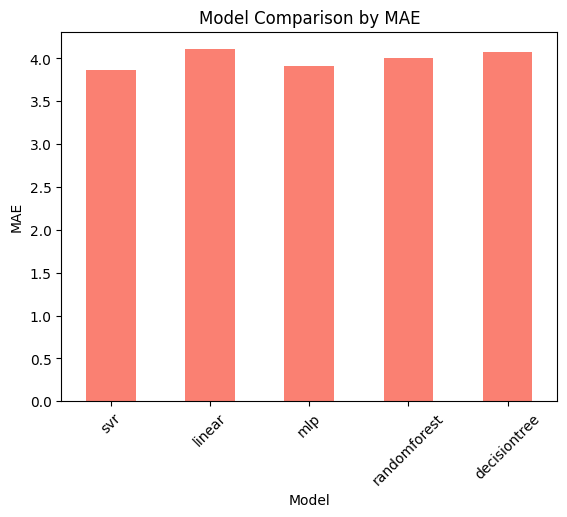

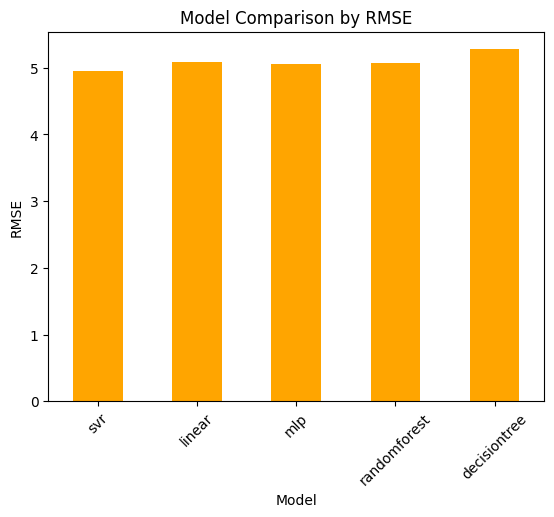

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🏆 Best Model by R²: svr with R² = 0.100
🏆 Best Model by RMSE: svr with RMSE = 4.944
🏆 Best Model by MAE: svr with MAE = 3.871


In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from google.colab import files

OUT_DIR = '/content'  # Update if needed

files_list = [f for f in os.listdir(OUT_DIR) if f.endswith('_results.csv') and f != 'kmeans_results.csv']

dfs = [pd.read_csv(os.path.join(OUT_DIR, f)).assign(Model=f.replace('_results.csv', '')) for f in files_list]
summary = pd.concat(dfs, ignore_index=True)

summary = summary[['Model', 'MAE', 'MSE', 'RMSE', 'R2']]

print("🔍 Model Performance Comparison:")
display(summary)

summary.plot(x='Model', y='R2', kind='bar', color='skyblue', legend=False)
plt.title('Model Comparison by R² Score')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.show()

summary.plot(x='Model', y='MAE', kind='bar', color='salmon', legend=False)
plt.title('Model Comparison by MAE')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

summary.plot(x='Model', y='RMSE', kind='bar', color='orange', legend=False)
plt.title('Model Comparison by RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

summary_csv_path = 'model_comparison_summary.csv'
summary.to_csv(summary_csv_path, index=False)
files.download(summary_csv_path)

# Best by R² (higher is better)
best_r2 = summary.sort_values(by='R2', ascending=False).iloc[0]

# Best by RMSE (lower is better)
best_rmse = summary.sort_values(by='RMSE', ascending=True).iloc[0]

# Best by MAE (lower is better)
best_mae = summary.sort_values(by='MAE', ascending=True).iloc[0]

print(f"\n🏆 Best Model by R²: {best_r2['Model']} with R² = {best_r2['R2']:.3f}")
print(f"🏆 Best Model by RMSE: {best_rmse['Model']} with RMSE = {best_rmse['RMSE']:.3f}")
print(f"🏆 Best Model by MAE: {best_mae['Model']} with MAE = {best_mae['MAE']:.3f}")
